![](https://logos-download.com/wp-content/uploads/2016/11/Y_Combinator_logo_text_wordmark.png)

# Predict companies' performance - Part 2/2

[Y-Combinator](https://www.ycombinator.com/) is one of the most famous incubator in the world. A lot of enormous licorn like: 
 
* [Dropbox](https://www.dropbox.com/) 
* [Airbnb](https://www.airbnb.com/) 
* [Coinbase](https://www.coinbase.com/) 
* [Stripe](https://stripe.com/) 
* [Zapier](https://zapier.com/)


Now that we have successfully done your linear regression, open a new notebook and try to do, this time, a multiple linear regression on `50_Startups.csv` dataset.

## Step 1 - Import Data 🤹‍♀️

- Import usual librairies

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np 
import seaborn as sns


- Import `50_Startups.csv` dataset

In [25]:
df = pd.read_csv("../99-assets/ML/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Step 2 - EDA 📊

- Visualize the relationship between `Marketing Spend` and `Profit`

<Axes: xlabel='[Marketing Spend]', ylabel='[Profit]'>

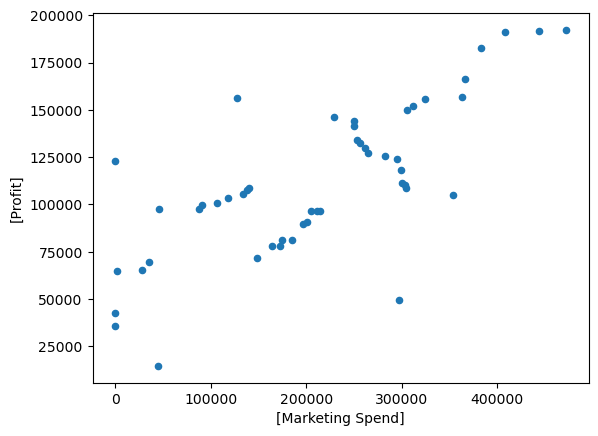

In [26]:
df.plot.scatter(["Marketing Spend"], ["Profit"])
#plt.scatter(df.iloc[:,2], df.iloc[:,4])

- Now visualize `R&D Spend` with `Profit`

<Axes: xlabel='[R&D Spend]', ylabel='[Profit]'>

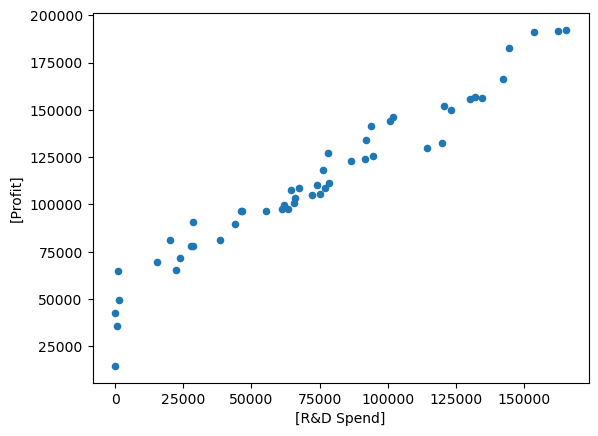

In [27]:
df.plot.scatter(["R&D Spend"], ["Profit"])

* Show your dataset's main statistics

In [28]:
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


* Check if you see any missing values 

In [29]:
df.isna().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [30]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [31]:
df.isna().sum() / len(df) * 100

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

## Step 3 - Preprocessing 🍳

- Split your dataset by $X$ and $y$

In [32]:
# X il attend une matrice 2D
# y il attend un vecteur 1D

feature_list = ["R&D Spend", "Administration", "Marketing Spend", "State"] 
X = df.loc[:, feature_list]

y = df.loc[:, "Profit"]


- Split your data in train and test sets

In [33]:
# pas de stratify 
# Si stratify = y       # Allows you to stratify your sample. 
                        # Meaning, you will have the same
                        # proportion of categories in test 
                        # and train set

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)


In [53]:
print(type(X_train))

<class 'numpy.ndarray'>


- Make all the required preprocessings on the train set

In [34]:
print(X_train[:5])

numeric_features = [0, 1, 2 ]
numeric_transformer = StandardScaler()                               # moyenne 0 et ecart type à 1

categorical_features = [3]
#categorical_transformer = OneHotEncoder(drop='first') # Pour virer l'Angleterre comme dans l'exemple ci-dessus on aurait mis drop="last" mais ça n'existe pas
categorical_transformer = OneHotEncoder()


featureencoder = ColumnTransformer(                                 # ColumnTransformer provient du module compose
    transformers=[

      # Attention il semble que l'ordre compte. 
      ('cat', categorical_transformer, categorical_features),
      ('num', numeric_transformer, numeric_features)

      # ('num', numeric_transformer, numeric_features),
      # ('cat', categorical_transformer, categorical_features)
    ]

)

X_train = featureencoder.fit_transform(X_train)
print(X_train[:5])


    R&D Spend  Administration  Marketing Spend       State
33   55493.95       103057.49        214634.81     Florida
35   46014.02        85047.44        205517.64    New York
26   75328.87       144135.98        134050.07     Florida
34   46426.07       157693.92        210797.67  California
18   91749.16       114175.79        294919.57     Florida
[[ 0.          1.          0.         -0.35006454 -0.78547109  0.1011968 ]
 [ 0.          0.          1.         -0.55530319 -1.48117426  0.02734979]
 [ 0.          1.          0.          0.07935762  0.80133381 -0.55152132]
 [ 1.          0.          0.         -0.54638238  1.32505817  0.07011684]
 [ 0.          1.          0.          0.43485371 -0.35598663  0.75148516]]


## Build your model 🏋️‍♂️

- Create and fit your model

In [35]:
# Train model
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !


LinearRegression()

- Make predictions on train set

In [36]:
y_train_pred = regressor.predict(X_train)
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)


[ 95764.42320496  89164.62849777 109506.72329085  91366.2188941
 127111.48666646]


- Make predictions on test set (make sure you apply the same preprocessings as before!)

In [37]:
X_test = featureencoder.transform(X_test)
print(X_test[:5])

y_test_pred = regressor.predict(X_test)
print(y_test_pred[:5])

[[ 0.          1.          0.         -0.1214952   2.2889053  -0.68032287]
 [ 1.          0.          0.          0.6280306  -1.22069499  0.38557774]
 [ 0.          1.          0.          0.65490061 -0.49434195  0.21885524]
 [ 0.          1.          0.         -0.94762148 -1.49417936 -0.30512104]
 [ 0.          1.          0.          1.77048111 -0.85932667  1.6668808 ]]
[103015.20159796 132582.27760816 132447.73845174  71976.09851258
 178537.48221055]


### Prédiction sur un jeu de valeurs en particulier

In [55]:
           
Bob = {
  "R&D Spend" : [55_493],
  "Administration" : [103_057], 
  "Marketing Spend" : [214_634],
  "State" : ["Florida"]
}

Zoubida = pd.DataFrame(Bob)
Zoubida = featureencoder.transform(Zoubida)  # ! pas oublier les transform
ProfitAttendu = regressor.predict(Zoubida)
print("Profit = ", *ProfitAttendu)

Profit =  95763.6426435534


- Let's see scores of your model on train and test set.

In [39]:
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set     : ", regressor.score(X_test, y_test))

R2 score on training set :  0.9501847627493607
R2 score on test set     :  0.9347068473282426


- What do you think about it ?

>Very small overfitting. We can consider our model performant!

## Bonus - Feature Importance 🏄‍♂️

* Now harder, try to visualize the coefficients of your model and therefore deduce a feature importance ranking

In [ ]:
# First, let's see how we can see how we can check out our coefficients: 
print("Coefficients are               : ", *regressor.coef_, "\n") 
print("Constant is                    : ", regressor.intercept_, "\n")

# Access transformers from feature_encoder
print("All transformers are           : ", featureencoder.transformers_, "\n")

# Access one specific transformer
print("One Hot Encoder transformer is : ", featureencoder.transformers_[0][1], "\n")


# Now we can simply check the categories
# Print categories
categorical_column_names = featureencoder.transformers_[0][1].categories_
print("Categorical columns are        : ", categorical_column_names, "\n")


# Now we can concatenate them with the numerical column names. 
# We will use `numeric_features` variable to determine the name of our columns
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("Numerical columns are          : ", *numerical_column_names, "\n")


# Finally, we need to concatenate our `numerical_column_names` and our `categorical_column_names`. 
# The easiest way to do it is by using [np.append]
# (https://numpy.org/doc/stable/reference/generated/numpy.append.html)


# Append all columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)
print("All col names                  : ", *all_column_names, "\n")

# Now we can finally rank all columns by importance using coefficients
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names" : all_column_names,
    "coefficients"  : regressor.coef_
})

print("Feature importance             :\n")
print(feature_importance, "\n")

# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
# sns.catplot(x = "feature_names", 
#             y = "coefficients", 
#             data = feature_importance.sort_values(by="coefficients", ascending = False), 
#             kind = "bar",
#             aspect = 1.618,
#             alpha = 0.9
#             ) # Resize graph

Coefficients are               :  86.63836917926824 -872.6457908778044 786.0074216985363 35726.28774249068 851.3016344760152 4519.882776982471 

Constant is                    :  109354.85075245326 

All transformers are           :  [('cat', OneHotEncoder(), [3]), ('num', StandardScaler(), [0, 1, 2])] 

One Hot Encoder transformer is :  OneHotEncoder() 

Categorical columns are        :  [array(['California', 'Florida', 'New York'], dtype=object)] 

Numerical columns are          :  R&D Spend Administration Marketing Spend 

All col names                  :  California Florida New York R&D Spend Administration Marketing Spend 

Feature importance             :

     feature_names  coefficients
0       California     86.638369
1          Florida   -872.645791
2         New York    786.007422
3        R&D Spend  35726.287742
4   Administration    851.301634
5  Marketing Spend   4519.882777 



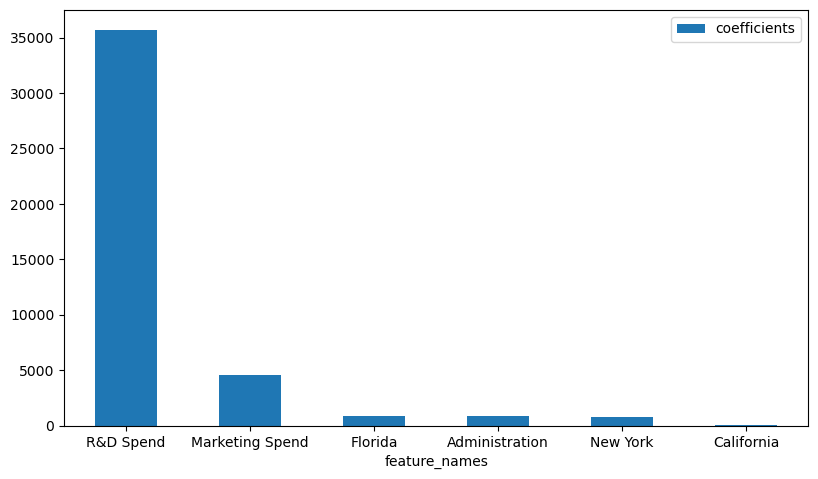

In [ ]:
_ = feature_importance.sort_values(by="coefficients", ascending=False).plot(kind="bar", x="feature_names", figsize=(16*.6, 9*.6))
_ = plt.xticks(rotation=0)

R&D Spend compte 7 fois plus que le marketing.